In [18]:
import plotnine as p9

# Cross Validation

In [1]:
import pandas as pd
import os
import numpy as np
import sklearn.model_selection
import sklearn.metrics
import json

DATA_PATH = '../data/cross_validation'

FOLDERS = [
  "Logistic Regression_{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}False_True_True",
  "Logistic Regression_{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}True_True_True"
]

performance_metrics = pd.DataFrame()
for folder in FOLDERS:
  algorithm = folder[:folder.find('_')]
  hyper_parameters = folder[folder.find('_') + 1:folder.find('}') + 1]
  normalization, logarithm, differences = folder[folder.find('}') + 1:].split('_')
  
  files = [os.path.join(DATA_PATH, folder, file) for file in os.listdir(os.path.join(DATA_PATH, folder))]
  
  df = pd.DataFrame()
  for file in files:
    df = pd.concat([
      df,
      pd.read_csv(file)
    ])
  
  performance_report = sklearn.metrics.classification_report(df['real'], df['prediction'], target_names = ['NO_EXOPLANETS', 'EXOPLANETS'], output_dict = True)

  performance_metrics = pd.concat([
    performance_metrics,
    pd.DataFrame( {
      'class' : ['NO_EXOPLANETS', 'EXOPLANETS'],
      'normalization' : [int(json.loads(normalization.lower())), int(json.loads(normalization.lower()))],
      'logarithm' : [int(json.loads(logarithm.lower())), int(json.loads(logarithm.lower()))],
      'differences' : [int(json.loads(differences.lower())), int(json.loads(differences.lower()))],
      'algorithm' : [algorithm, algorithm],
      'hyper_parameters' : [hyper_parameters, hyper_parameters],
      'accuracy' : [np.around(performance_report['accuracy'], decimals = 5), np.around(performance_report['accuracy'], decimals = 5)],
      'precision' : [np.around(performance_report['NO_EXOPLANETS']['precision'], decimals = 5), np.around(performance_report['EXOPLANETS']['precision'], decimals = 5)],
      'recall' : [np.around(performance_report['NO_EXOPLANETS']['recall'], decimals = 5), np.around(performance_report['EXOPLANETS']['recall'], decimals = 5)],
      'f1_score' : [np.around(performance_report['NO_EXOPLANETS']['f1-score'], decimals = 5), np.around(performance_report['EXOPLANETS']['f1-score'], decimals = 5)],
    }),
  ])

In [2]:
for file in [file_name for file_name in os.listdir(DATA_PATH) if os.path.isfile(os.path.join(DATA_PATH, file_name))]:
  performance_metrics = pd.concat([
    performance_metrics,
    pd.read_csv(os.path.join(DATA_PATH, file))
  ])

In [4]:
performance_metrics.sort_values(by = ['normalization', 'logarithm', 'differences', 'algorithm', 'hyper_parameters'])

,class,normalization,logarithm,differences,algorithm,hyper_parameters,accuracy,precision,recall,f1_score
0,NO_EXOPLANETS,0,0,1,Logistic Regression,"{'C': 1, 'max_iter': 100000, 'n_jobs': -1, 'pe...",0.99912,0.99982,0.99929,0.99955
1,EXOPLANETS,0,0,1,Logistic Regression,"{'C': 1, 'max_iter': 100000, 'n_jobs': -1, 'pe...",0.99912,0.91111,0.97619,0.94253
0,NO_EXOPLANETS,0,0,1,Logistic Regression,"{'max_iter': 100000, 'n_jobs': -1}",0.99965,1.00000,0.99964,0.99982
1,EXOPLANETS,0,0,1,Logistic Regression,"{'max_iter': 100000, 'n_jobs': -1}",0.99965,0.95455,1.00000,0.97674
0,NO_EXOPLANETS,0,0,1,Support Vector Machine,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}",0.99947,1.00000,0.99947,0.99973
1,EXOPLANETS,0,0,1,Support Vector Machine,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}",0.99947,0.93333,1.00000,0.96552
0,NO_EXOPLANETS,0,1,1,Logistic Regression,"{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, '...",0.99806,0.99840,0.99964,0.99902
1,EXOPLANETS,0,1,1,Logistic Regression,"{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, '...",0.99806,0.94286,0.78571,0.85714
0,NO_EXOPLANETS,0,1,1,Logistic Regression,"{'max_iter': 100000, 'n_jobs': -1}",0.99982,1.00000,0.99982,0.99991
1,EXOPLANETS,0,1,1,Logistic Regression,"{'max_iter': 100000, 'n_jobs': -1}",0.99982,0.97674,1.00000,0.98824


In [10]:
pd.set_option('max_colwidth', None)
performance_metrics[performance_metrics['class'] == 'EXOPLANETS'].sort_values(by = ['normalization', 'logarithm', 'differences', 'algorithm', 'hyper_parameters'])[['normalization', 'logarithm', 'differences', 'algorithm', 'hyper_parameters', 'accuracy', 'precision', 'recall', 'f1_score']]

,normalization,logarithm,differences,algorithm,hyper_parameters,accuracy,precision,recall,f1_score
1,0,0,1,Logistic Regression,"{'C': 1, 'max_iter': 100000, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'saga'}",0.99912,0.91111,0.97619,0.94253
1,0,0,1,Logistic Regression,"{'max_iter': 100000, 'n_jobs': -1}",0.99965,0.95455,1.00000,0.97674
1,0,0,1,Support Vector Machine,"{'C': 10, 'gamma': 1, 'kernel': 'poly'}",0.99947,0.93333,1.00000,0.96552
1,0,1,1,Logistic Regression,"{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}",0.99806,0.94286,0.78571,0.85714
1,0,1,1,Logistic Regression,"{'max_iter': 100000, 'n_jobs': -1}",0.99982,0.97674,1.00000,0.98824
1,0,1,1,Random Forest,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 10, 'n_jobs': -1}",0.99576,1.00000,0.42857,0.60000
1,0,1,1,Support Vector Machine,"{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.99364,0.65000,0.30952,0.41935
1,1,1,1,K-Nearest Neighbours,"{'algorithm': 'ball_tree', 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}",0.99894,1.00000,0.85714,0.92308
1,1,1,1,Logistic Regression,"{'C': 0.1, 'max_iter': 100000, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'saga'}",0.99664,0.89655,0.61905,0.73239
1,1,1,1,Logistic Regression,"{'max_iter': 100000, 'n_jobs': -1}",0.99965,0.95455,1.00000,0.97674


# Feature Importance

In [14]:
import tsfel
feature_config = tsfel.get_features_by_domain()
def get_domain_from_feature(feature : str) -> str:
  domains = ['spectral', 'statistical', 'temporal']
  feature_name = feature.split('_')[0]
  for domain in domains:
    if feature_config.get(domain, {}).get(feature_name) == None:
      continue
    else:
      return domain

## "Perfect" Models

In [20]:
DATA_PATH = '../data'
FEATURE_IMPORTANCE_PATH = '../data/feature_importance'

### First Differences

In [21]:
first_differences_feature_importance = pd.read_csv(os.path.join(FEATURE_IMPORTANCE_PATH, 'False_False_True.csv'))
first_differences_feature_importance['feature'] = first_differences_feature_importance['feature'].apply(lambda x : x.replace('0_', ''))

In [40]:
top_35 = first_differences_feature_importance.groupby(by = ['feature']).agg(
  coefficient_mean = ('coefficient', 'mean'),
  coefficient_sd = ('coefficient', 'std'),
  absolute_coefficient_mean = ('absolute_coefficient', 'mean'),
  absolute_coefficient_sd = ('absolute_coefficient', 'std'),
  ).apply(lambda x : round(x, 3)).reset_index().sort_values(by = ['absolute_coefficient_mean'], ascending = False).head(35)
top_35['domain'] = top_35['feature'].apply(lambda x : get_domain_from_feature(x))
top_35.head()

,feature,coefficient_mean,coefficient_sd,absolute_coefficient_mean,absolute_coefficient_sd,domain
22,Histogram_5,1.235,0.001,1.235,0.001,statistical
5,Entropy,-0.414,0.001,0.414,0.001,temporal
62,Spectral entropy,-0.288,0.001,0.288,0.001,spectral
31,LPCC_3,-0.255,0.001,0.255,0.001,spectral
64,Spectral positive turning points,0.225,0.001,0.225,0.001,spectral


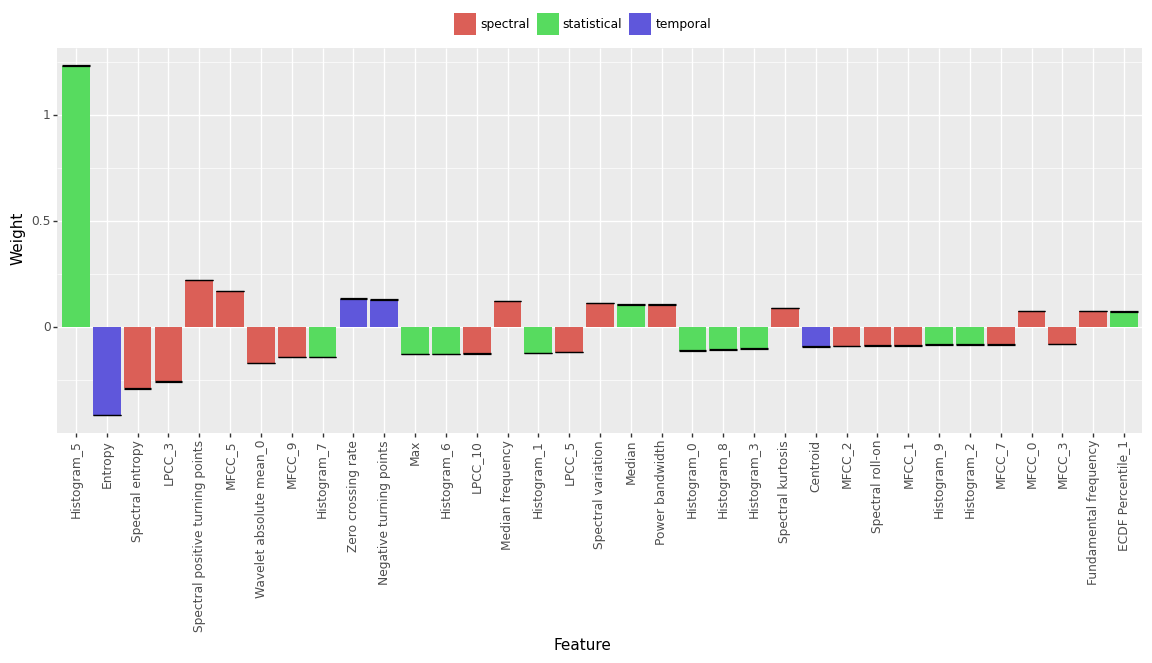

<ggplot: (704142685)>

In [42]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'coefficient_mean - coefficient_sd', ymax = 'coefficient_mean + coefficient_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

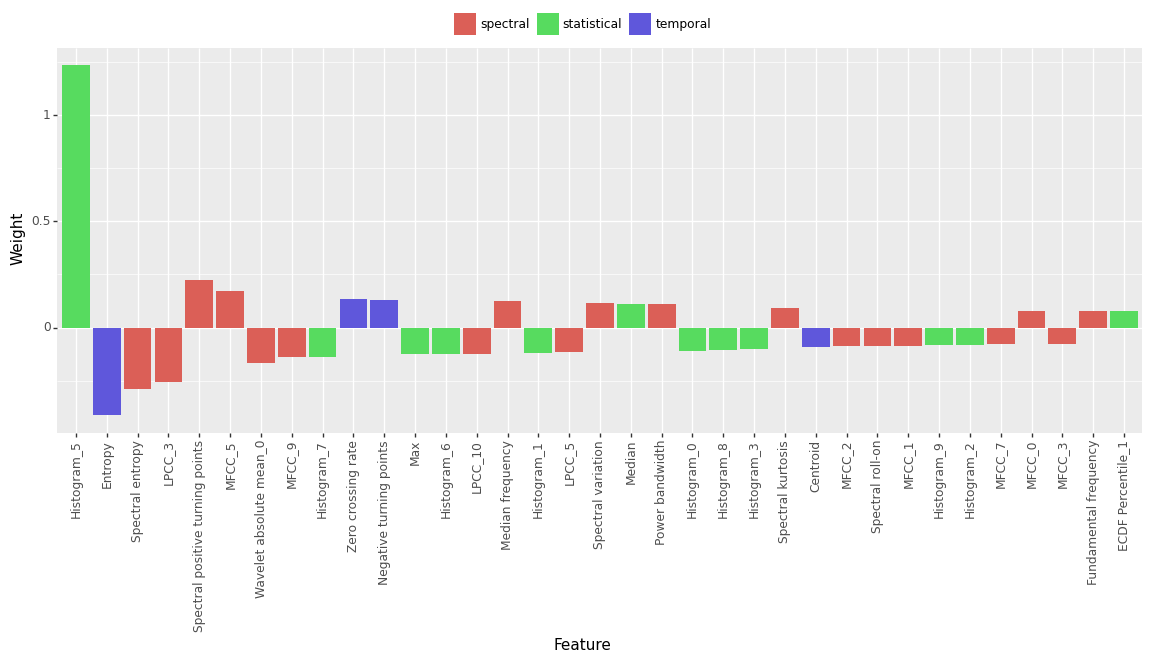

<ggplot: (704222782)>

In [43]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

In [25]:
training_set_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'train_False_False_True.csv'))
testing_set_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'test_False_False_True.csv'))

X_train_first_differences = training_set_first_differences.select_dtypes('number')
y_train_first_differences = training_set_first_differences['exoplanets']
X_test_first_differences = testing_set_first_differences.select_dtypes('number')
y_test_first_differences = testing_set_first_differences['exoplanets']


In [26]:
all_data_features_first_differences = pd.concat([X_train_first_differences, X_test_first_differences]).reset_index(drop = True)
all_data_features_first_differences['exoplanets'] = np.concatenate((y_train_first_differences, y_test_first_differences), axis = None)

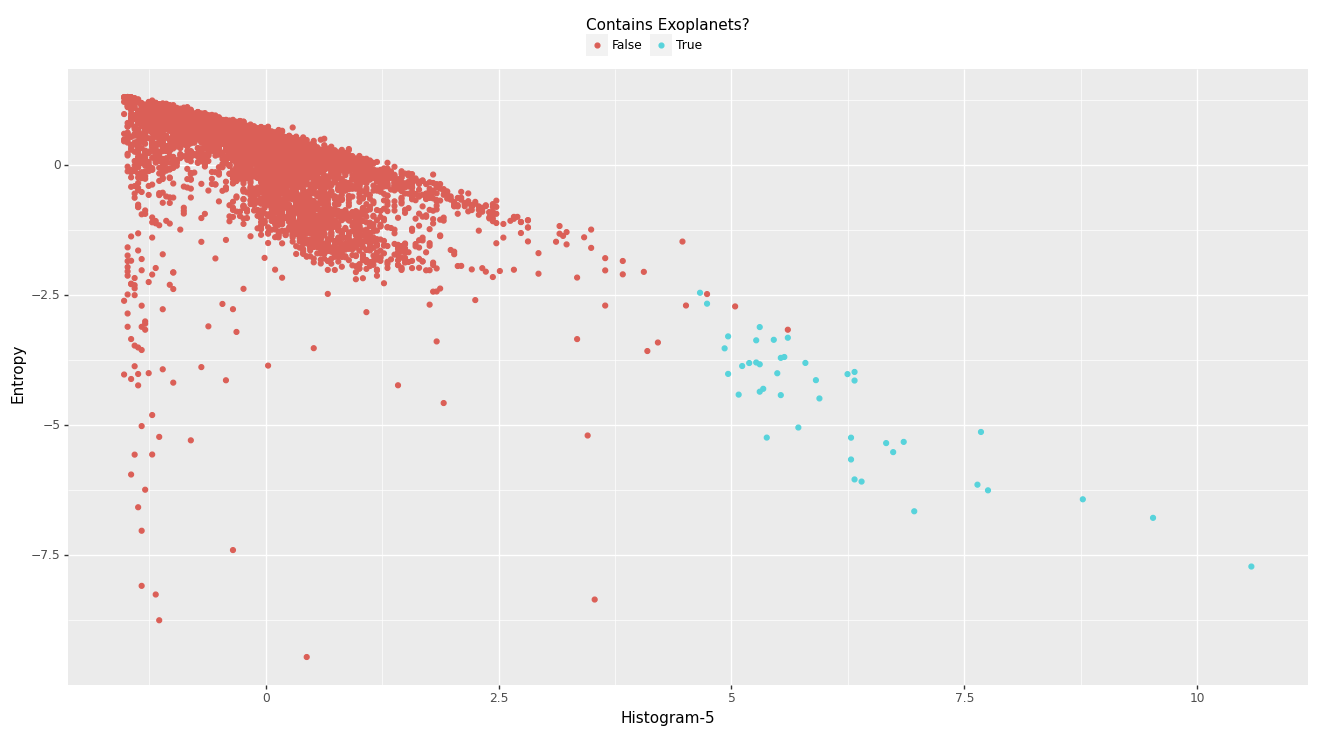

<ggplot: (399721379)>

In [30]:
p9.ggplot(all_data_features_first_differences,
  p9.aes(x = '0_Histogram_5', y = '0_Entropy', color = 'exoplanets')
  ) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Histogram-5') + \
  p9.ylab('Entropy') + \
  p9.labs(color = 'Contains Exoplanets?') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.15,
    },
    figure_size = (16, 8),
  )

## Logarithm + First Differences

In [53]:
log_first_differences_feature_importance = pd.DataFrame()
for file in os.listdir(os.path.join(FEATURE_IMPORTANCE_PATH, 'False_True_True')):
  log_first_differences_feature_importance = pd.concat([
    log_first_differences_feature_importance,
    pd.read_csv(os.path.join(FEATURE_IMPORTANCE_PATH, 'False_True_True', file))
  ])

In [54]:
log_first_differences_feature_importance['feature'] = log_first_differences_feature_importance['feature'].apply(lambda x : x.replace('0_', ''))

In [55]:
top_35 = log_first_differences_feature_importance.groupby(by = ['feature']).agg(
  coefficient_mean = ('coefficient', 'mean'),
  coefficient_sd = ('coefficient', 'std'),
  absolute_coefficient_mean = ('absolute_coefficient', 'mean'),
  absolute_coefficient_sd = ('absolute_coefficient', 'std'),
  ).apply(lambda x : round(x, 3)).reset_index().sort_values(by = ['absolute_coefficient_mean'], ascending = False).head(35)
top_35['domain'] = top_35['feature'].apply(lambda x : get_domain_from_feature(x))
top_35.head()

,feature,coefficient_mean,coefficient_sd,absolute_coefficient_mean,absolute_coefficient_sd,domain
4,Entropy,-0.383,0.007,0.383,0.007,temporal
180,FFT mean coefficient_41,-0.045,0.001,0.045,0.001,spectral
231,Histogram_5,0.041,0.001,0.041,0.001,statistical
181,FFT mean coefficient_42,0.041,0.001,0.041,0.001,spectral
240,LPCC_3,-0.036,0.000,0.036,0.000,spectral


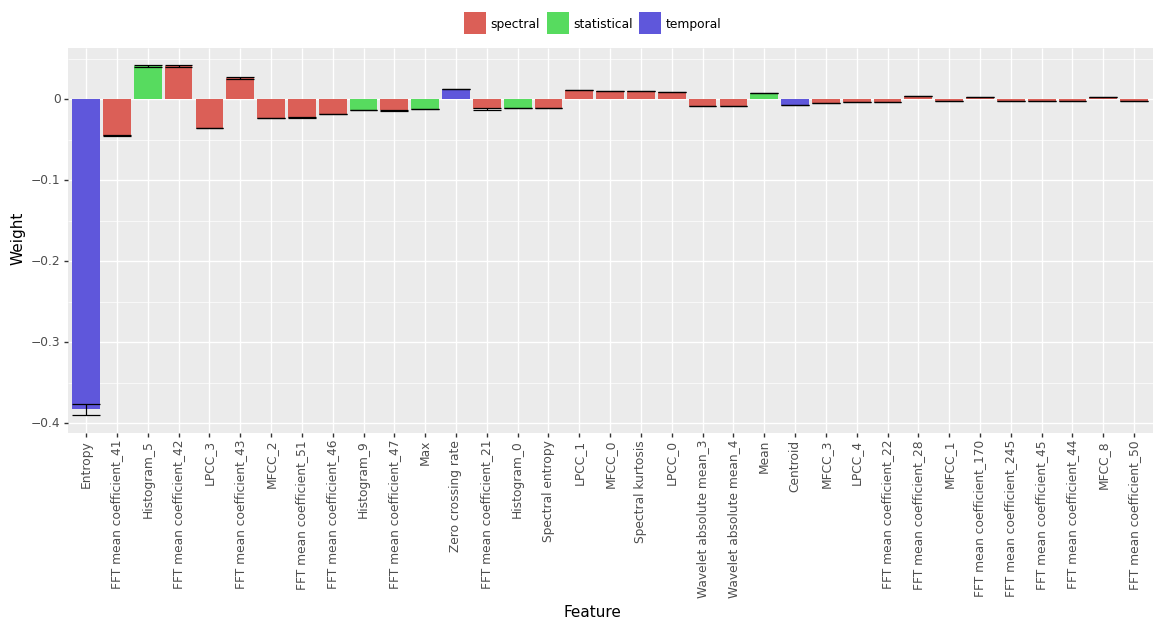

<ggplot: (704957504)>

In [56]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'coefficient_mean - coefficient_sd', ymax = 'coefficient_mean + coefficient_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

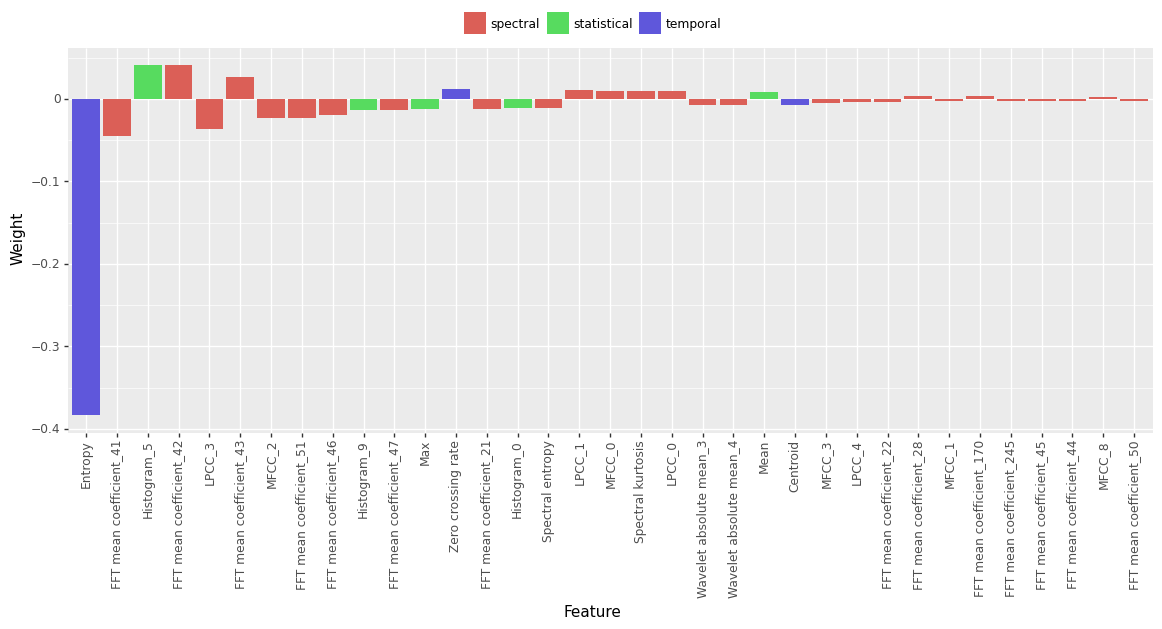

<ggplot: (704224893)>

In [57]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

In [58]:
training_set_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'train_False_True_True.csv'))
testing_set_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'test_False_True_True.csv'))

X_train_log_first_differences = training_set_log_first_differences.select_dtypes('number')
y_train_log_first_differences = training_set_log_first_differences['exoplanets']
X_test_log_first_differences = testing_set_log_first_differences.select_dtypes('number')
y_test_log_first_differences = testing_set_log_first_differences['exoplanets']


In [59]:
all_data_features_log_first_differences = pd.concat([X_train_log_first_differences, X_test_log_first_differences]).reset_index(drop = True)
all_data_features_log_first_differences['exoplanets'] = np.concatenate((y_train_log_first_differences, y_test_log_first_differences), axis = None)

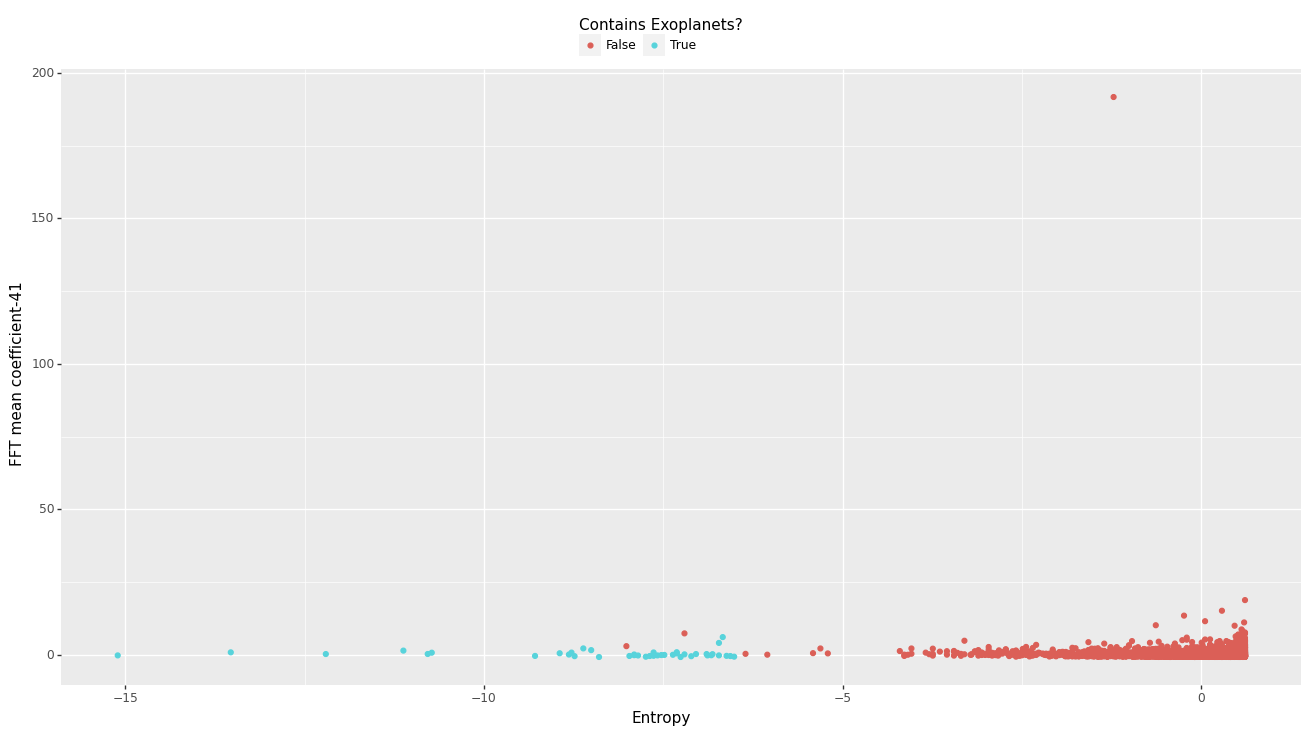

<ggplot: (704931837)>

In [60]:
p9.ggplot(all_data_features_log_first_differences,
  p9.aes(y = '0_FFT mean coefficient_41', x = '0_Entropy', color = 'exoplanets')
  ) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Entropy') + \
  p9.ylab('FFT mean coefficient-41') + \
  p9.labs(color = 'Contains Exoplanets?') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.15,
    },
    figure_size = (16, 8),
  )

## Normalization + Logarithm + First Differences

In [61]:
norm_log_first_differences_feature_importance = pd.DataFrame()
for file in os.listdir(os.path.join(FEATURE_IMPORTANCE_PATH, 'True_True_True')):
  norm_log_first_differences_feature_importance = pd.concat([
    norm_log_first_differences_feature_importance,
    pd.read_csv(os.path.join(FEATURE_IMPORTANCE_PATH, 'True_True_True', file))
  ])

In [62]:
norm_log_first_differences_feature_importance['feature'] = norm_log_first_differences_feature_importance['feature'].apply(lambda x : x.replace('0_', ''))

In [63]:
top_35 = norm_log_first_differences_feature_importance.groupby(by = ['feature']).agg(
  coefficient_mean = ('coefficient', 'mean'),
  coefficient_sd = ('coefficient', 'std'),
  absolute_coefficient_mean = ('absolute_coefficient', 'mean'),
  absolute_coefficient_sd = ('absolute_coefficient', 'std'),
  ).apply(lambda x : round(x, 3)).reset_index().sort_values(by = ['absolute_coefficient_mean'], ascending = False).head(35)
top_35['domain'] = top_35['feature'].apply(lambda x : get_domain_from_feature(x))
top_35.head()

,feature,coefficient_mean,coefficient_sd,absolute_coefficient_mean,absolute_coefficient_sd,domain
4,Entropy,-0.303,0.009,0.303,0.009,temporal
215,LPCC_3,-0.036,0.001,0.036,0.001,spectral
254,Spectral variation,0.032,0.001,0.032,0.001,spectral
216,LPCC_4,-0.031,0.000,0.031,0.000,spectral
249,Spectral entropy,-0.029,0.000,0.029,0.000,spectral


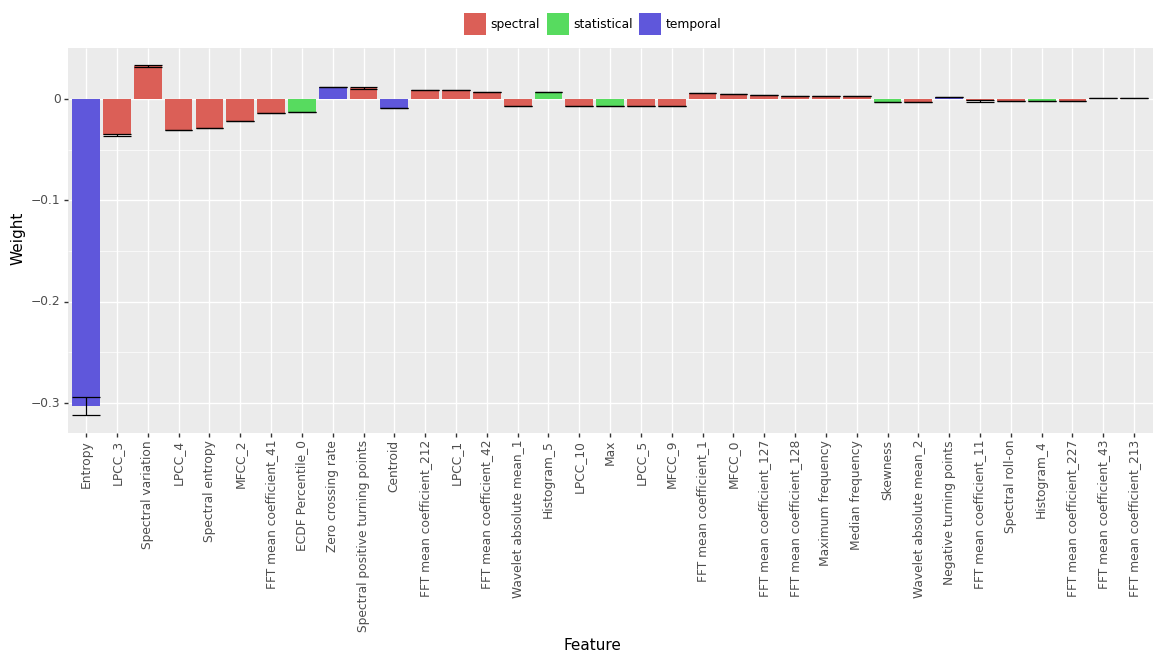

<ggplot: (687304873)>

In [64]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'coefficient_mean - coefficient_sd', ymax = 'coefficient_mean + coefficient_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

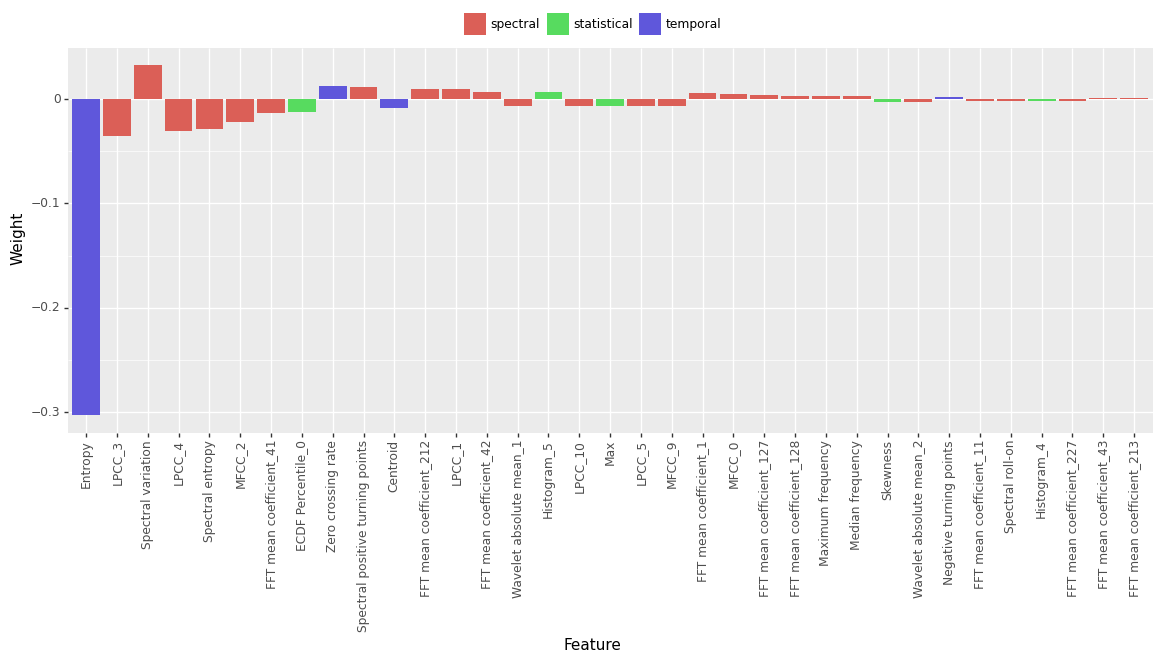

<ggplot: (686704947)>

In [65]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

In [66]:
training_set_norm_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'train_True_True_True.csv'))
testing_set_norm_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'test_True_True_True.csv'))

X_train_norm_log_first_differences = training_set_norm_log_first_differences.select_dtypes('number')
y_train_norm_log_first_differences = training_set_norm_log_first_differences['exoplanets']
X_test_norm_log_first_differences = testing_set_norm_log_first_differences.select_dtypes('number')
y_test_norm_log_first_differences = testing_set_norm_log_first_differences['exoplanets']


In [67]:
all_data_features_norm_log_first_differences = pd.concat([X_train_norm_log_first_differences, X_test_norm_log_first_differences]).reset_index(drop = True)
all_data_features_norm_log_first_differences['exoplanets'] = np.concatenate((y_train_norm_log_first_differences, y_test_norm_log_first_differences), axis = None)

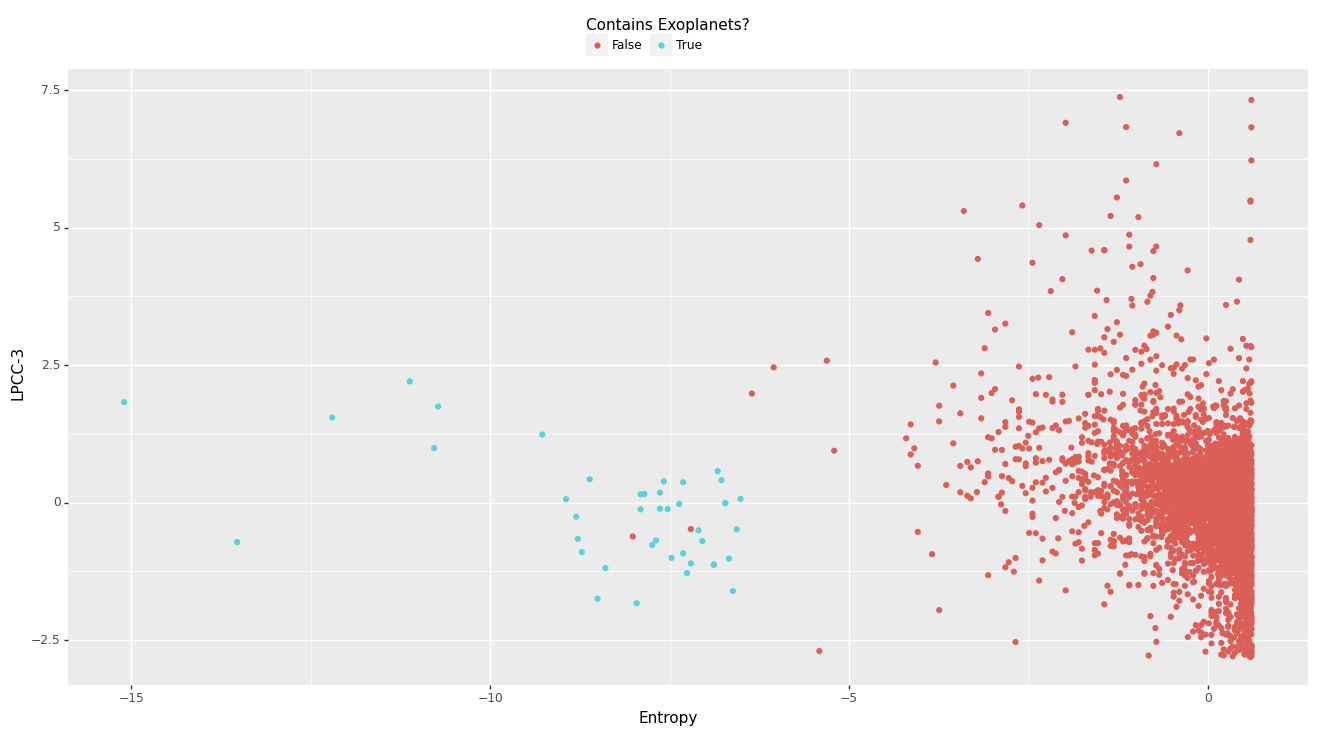

<ggplot: (686702989)>

In [68]:
p9.ggplot(all_data_features_norm_log_first_differences,
  p9.aes(y = '0_LPCC_3', x = '0_Entropy', color = 'exoplanets')
  ) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Entropy') + \
  p9.ylab('LPCC-3') + \
  p9.labs(color = 'Contains Exoplanets?') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.15,
    },
    figure_size = (16, 8),
  )

## Default Logistic Regression

In [70]:
[file for file in os.listdir(os.path.join(FEATURE_IMPORTANCE_PATH)) if file.startswith('Logistic Regression')]

["Logistic Regression_{'max_iter': 100000, 'n_jobs': -1}False_False_True.csv",
 "Logistic Regression_{'max_iter': 100000, 'n_jobs': -1}True_True_True.csv",
 "Logistic Regression_{'max_iter': 100000, 'n_jobs': -1}False_True_True.csv"]

### First Differences

In [71]:
first_differences_feature_importance = pd.read_csv(os.path.join(FEATURE_IMPORTANCE_PATH, "Logistic Regression_{'max_iter': 100000, 'n_jobs': -1}False_False_True.csv"))
first_differences_feature_importance['feature'] = first_differences_feature_importance['feature'].apply(lambda x : x.replace('0_', ''))

In [72]:
top_35 = first_differences_feature_importance.groupby(by = ['feature']).mean().reset_index().sort_values(by = ['absolute_coefficient'], ascending = False).head(35)
top_35['domain'] = top_35['feature'].apply(lambda x : get_domain_from_feature(x))
top_35.head()

,feature,coefficient,absolute_coefficient,absolute_rank,domain
22,Histogram_5,2.023895,2.023895,1.000000,statistical
5,Entropy,-0.721938,0.721938,2.000000,temporal
64,Spectral positive turning points,0.340311,0.340311,3.000354,spectral
31,LPCC_3,-0.292467,0.292467,4.001061,spectral
42,MFCC_5,0.276564,0.276564,5.004950,spectral


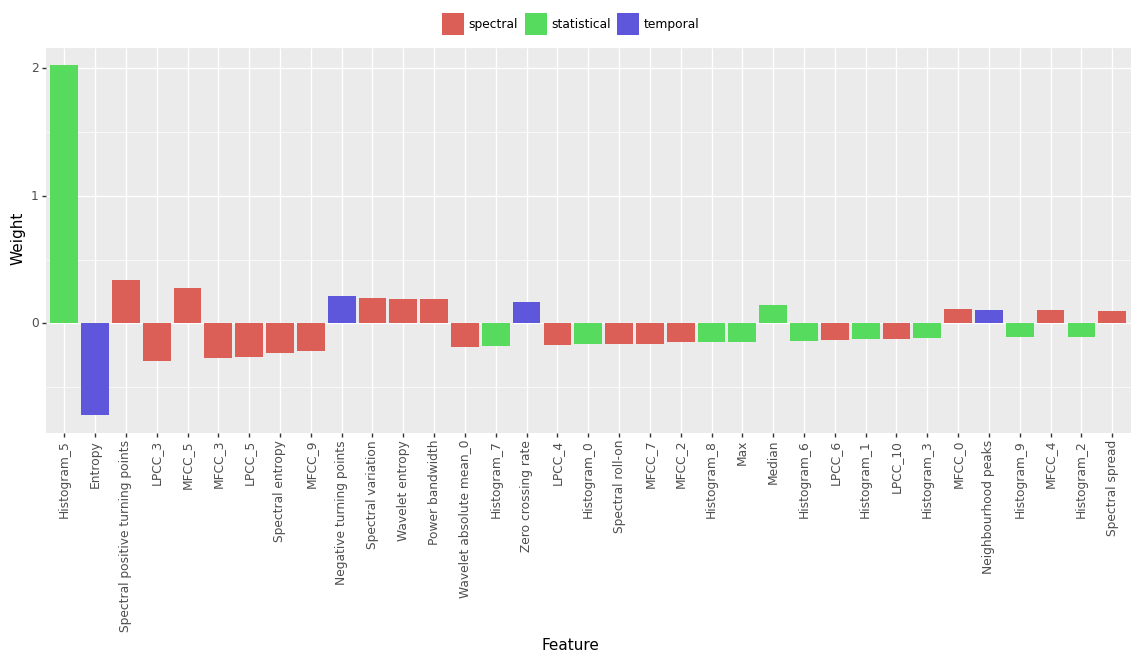

<ggplot: (686891681)>

In [73]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient)', y = 'coefficient', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

In [74]:
training_set_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'train_False_False_True.csv'))
testing_set_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'test_False_False_True.csv'))

X_train_first_differences = training_set_first_differences.select_dtypes('number')
y_train_first_differences = training_set_first_differences['exoplanets']
X_test_first_differences = testing_set_first_differences.select_dtypes('number')
y_test_first_differences = testing_set_first_differences['exoplanets']


In [75]:
all_data_features_first_differences = pd.concat([X_train_first_differences, X_test_first_differences]).reset_index(drop = True)
all_data_features_first_differences['exoplanets'] = np.concatenate((y_train_first_differences, y_test_first_differences), axis = None)

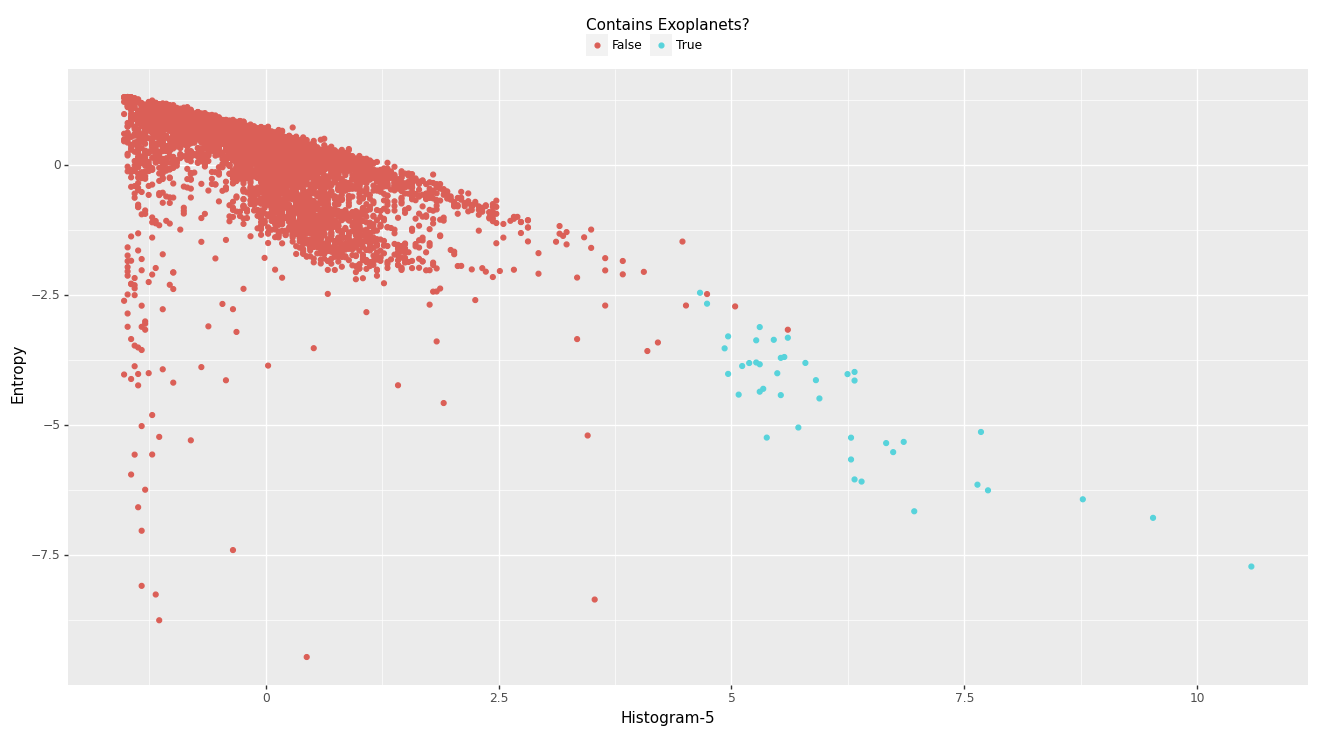

<ggplot: (680376170)>

In [76]:
p9.ggplot(all_data_features_first_differences,
  p9.aes(x = '0_Histogram_5', y = '0_Entropy', color = 'exoplanets')
  ) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Histogram-5') + \
  p9.ylab('Entropy') + \
  p9.labs(color = 'Contains Exoplanets?') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.15,
    },
    figure_size = (16, 8),
  )

### Logarithm + First Differences

In [77]:
log_first_differences_feature_importance = pd.read_csv(os.path.join(FEATURE_IMPORTANCE_PATH, "Logistic Regression_{'max_iter': 100000, 'n_jobs': -1}False_True_True.csv"))
log_first_differences_feature_importance['feature'] = log_first_differences_feature_importance['feature'].apply(lambda x : x.replace('0_', ''))

In [78]:
top_35 = log_first_differences_feature_importance.groupby(by = ['feature']).agg(
  coefficient_mean = ('coefficient', 'mean'),
  coefficient_sd = ('coefficient', 'std'),
  absolute_coefficient_mean = ('absolute_coefficient', 'mean'),
  absolute_coefficient_sd = ('absolute_coefficient', 'std'),
  ).apply(lambda x : round(x, 3)).reset_index().sort_values(by = ['absolute_coefficient_mean'], ascending = False).head(35)
top_35['domain'] = top_35['feature'].apply(lambda x : get_domain_from_feature(x))
top_35.head()

,feature,coefficient_mean,coefficient_sd,absolute_coefficient_mean,absolute_coefficient_sd,domain
4,Entropy,-1.824,0.001,1.824,0.001,temporal
182,FFT mean coefficient_43,0.249,0.001,0.249,0.001,spectral
101,FFT mean coefficient_2,-0.214,0.002,0.214,0.002,spectral
240,LPCC_3,-0.197,0.001,0.197,0.001,spectral
271,Slope,0.193,0.001,0.193,0.001,temporal


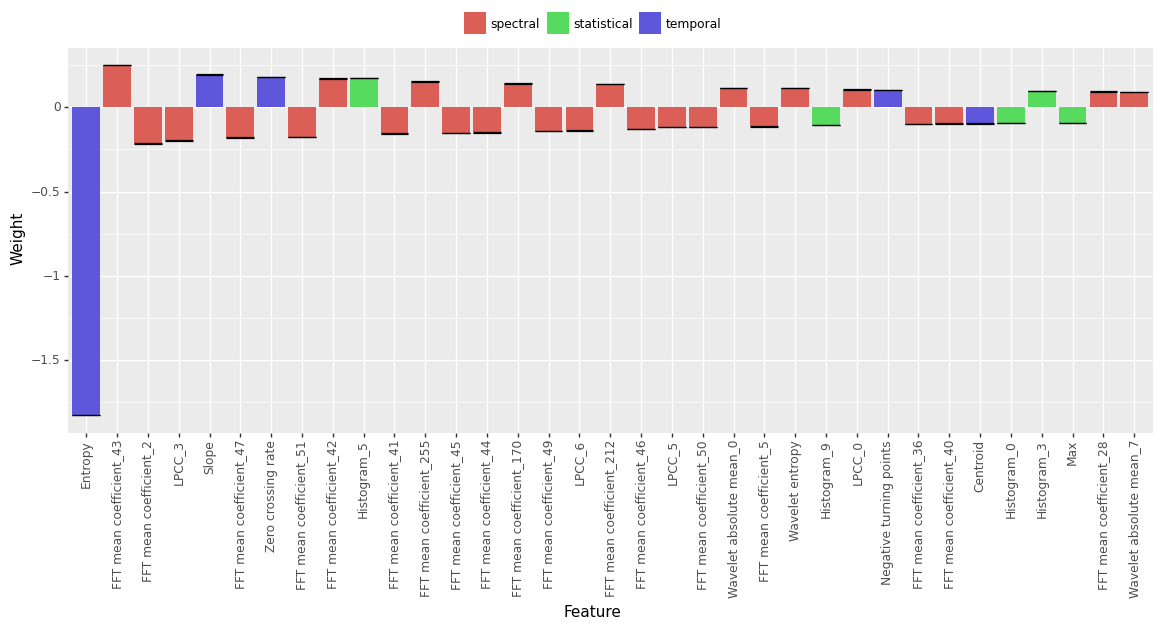

<ggplot: (738755410)>

In [79]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'coefficient_mean - coefficient_sd', ymax = 'coefficient_mean + coefficient_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

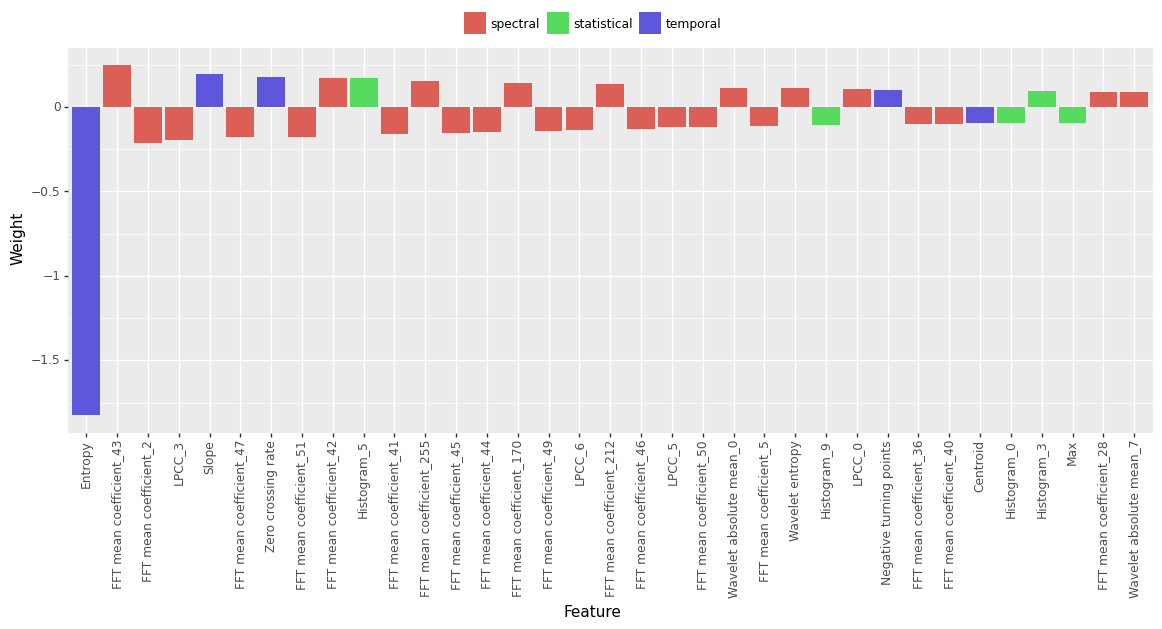

<ggplot: (743130329)>

In [80]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

In [81]:
training_set_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'train_False_True_True.csv'))
testing_set_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'test_False_True_True.csv'))

X_train_log_first_differences = training_set_log_first_differences.select_dtypes('number')
y_train_log_first_differences = training_set_log_first_differences['exoplanets']
X_test_log_first_differences = testing_set_log_first_differences.select_dtypes('number')
y_test_log_first_differences = testing_set_log_first_differences['exoplanets']


In [82]:
all_data_features_log_first_differences = pd.concat([X_train_log_first_differences, X_test_log_first_differences]).reset_index(drop = True)
all_data_features_log_first_differences['exoplanets'] = np.concatenate((y_train_log_first_differences, y_test_log_first_differences), axis = None)

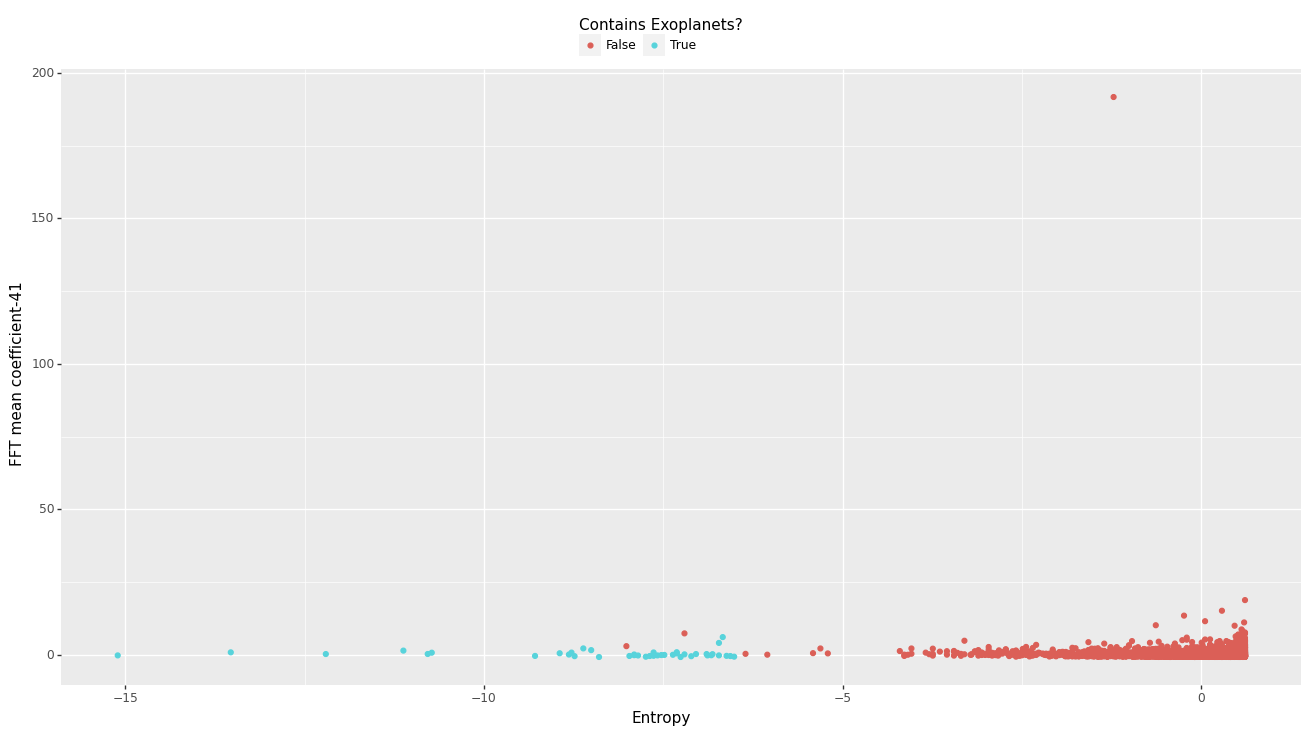

<ggplot: (738603978)>

In [83]:
p9.ggplot(all_data_features_log_first_differences,
  p9.aes(y = '0_FFT mean coefficient_41', x = '0_Entropy', color = 'exoplanets')
  ) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Entropy') + \
  p9.ylab('FFT mean coefficient-41') + \
  p9.labs(color = 'Contains Exoplanets?') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.15,
    },
    figure_size = (16, 8),
  )

### Normalization + Logarithm + First Differences

In [84]:
norm_log_first_differences_feature_importance = pd.read_csv(os.path.join(FEATURE_IMPORTANCE_PATH, "Logistic Regression_{'max_iter': 100000, 'n_jobs': -1}True_True_True.csv"))
norm_log_first_differences_feature_importance['feature'] = norm_log_first_differences_feature_importance['feature'].apply(lambda x : x.replace('0_', ''))

In [85]:
top_35 = norm_log_first_differences_feature_importance.groupby(by = ['feature']).agg(
  coefficient_mean = ('coefficient', 'mean'),
  coefficient_sd = ('coefficient', 'std'),
  absolute_coefficient_mean = ('absolute_coefficient', 'mean'),
  absolute_coefficient_sd = ('absolute_coefficient', 'std'),
  ).apply(lambda x : round(x, 3)).reset_index().sort_values(by = ['absolute_coefficient_mean'], ascending = False).head(35)
top_35['domain'] = top_35['feature'].apply(lambda x : get_domain_from_feature(x))
top_35.head()

,feature,coefficient_mean,coefficient_sd,absolute_coefficient_mean,absolute_coefficient_sd,domain
4,Entropy,-1.892,0.001,1.892,0.001,temporal
215,LPCC_3,-0.323,0.001,0.323,0.001,spectral
251,Spectral positive turning points,0.287,0.001,0.287,0.001,spectral
146,FFT mean coefficient_255,0.221,0.001,0.221,0.001,spectral
217,LPCC_5,-0.204,0.001,0.204,0.001,spectral


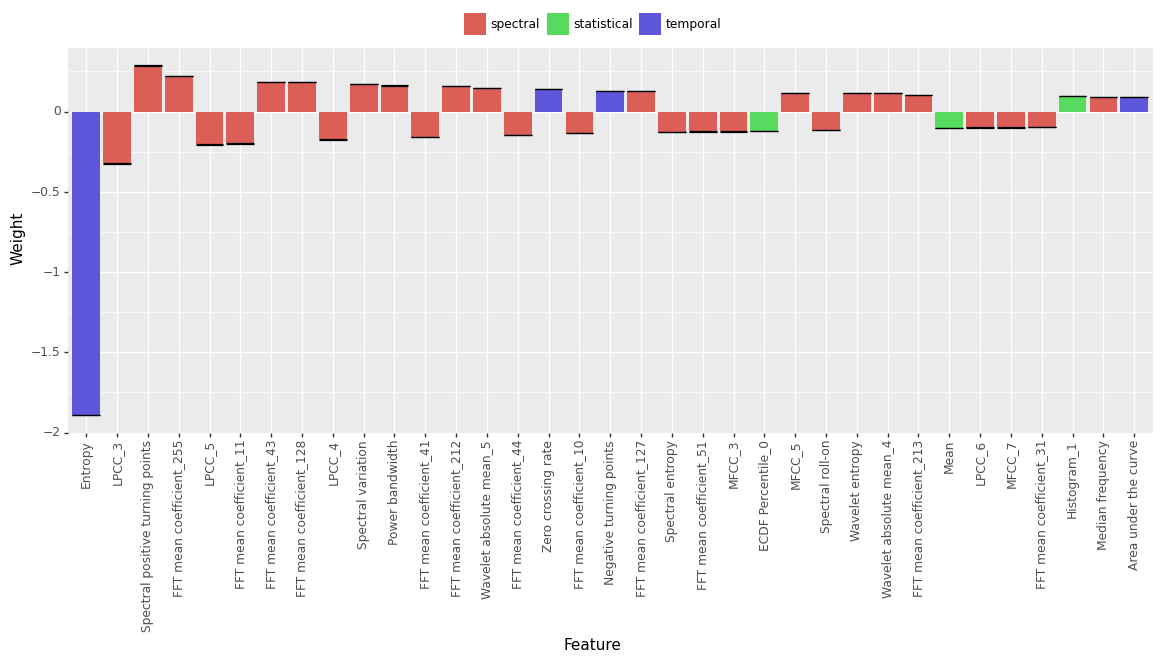

<ggplot: (743252509)>

In [86]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.geom_errorbar(p9.aes(ymin = 'coefficient_mean - coefficient_sd', ymax = 'coefficient_mean + coefficient_sd'), position = p9.position_dodge2(), width = .9) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

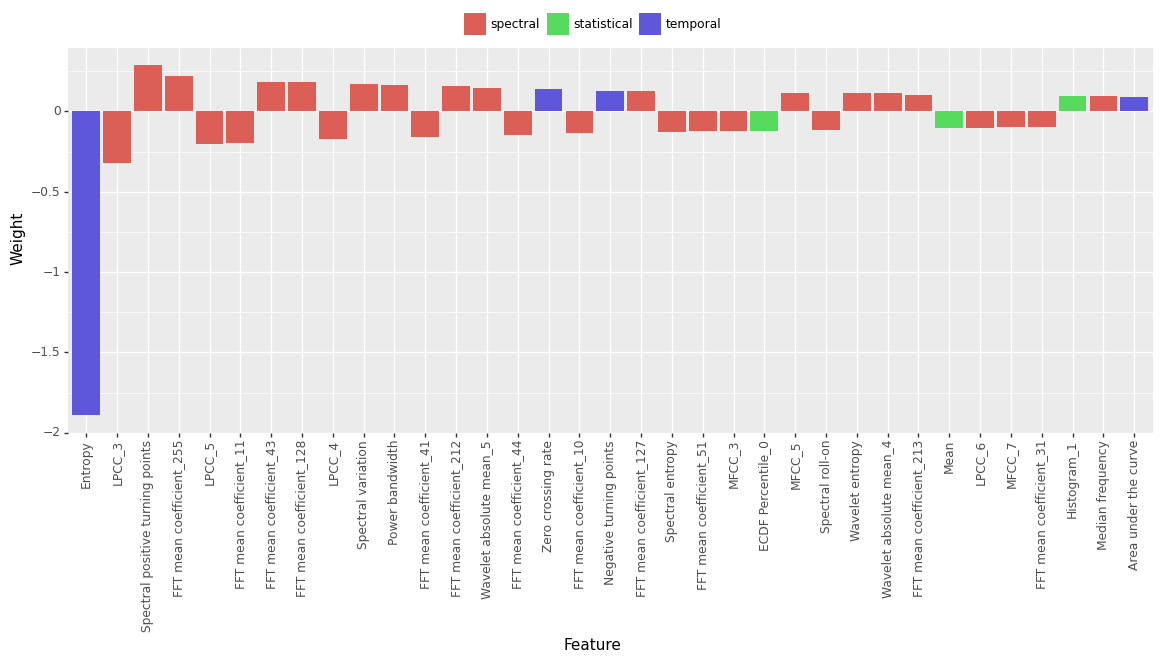

<ggplot: (684012538)>

In [87]:
p9.ggplot(top_35,
  p9.aes(x = 'reorder(feature, -absolute_coefficient_mean)', y = 'coefficient_mean', group = 'feature', fill = 'domain')) + \
  p9.theme_gray() + \
  p9.geom_bar(stat = 'identity', position = p9.position_dodge2()) + \
  p9.xlab('Feature') + \
  p9.ylab('Weight') + \
  p9.theme(
    legend_title = p9.element_blank(),
    legend_position = 'top',
    legend_box_margin = 0,
    axis_text_x = p9.element_text(angle = 90, vjust = 1),
    figure_size = (14, 5),
  )

In [88]:
training_set_norm_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'train_True_True_True.csv'))
testing_set_norm_log_first_differences = pd.read_csv(os.path.join(DATA_PATH, f'test_True_True_True.csv'))

X_train_norm_log_first_differences = training_set_norm_log_first_differences.select_dtypes('number')
y_train_norm_log_first_differences = training_set_norm_log_first_differences['exoplanets']
X_test_norm_log_first_differences = testing_set_norm_log_first_differences.select_dtypes('number')
y_test_norm_log_first_differences = testing_set_norm_log_first_differences['exoplanets']


In [89]:
all_data_features_norm_log_first_differences = pd.concat([X_train_norm_log_first_differences, X_test_norm_log_first_differences]).reset_index(drop = True)
all_data_features_norm_log_first_differences['exoplanets'] = np.concatenate((y_train_norm_log_first_differences, y_test_norm_log_first_differences), axis = None)

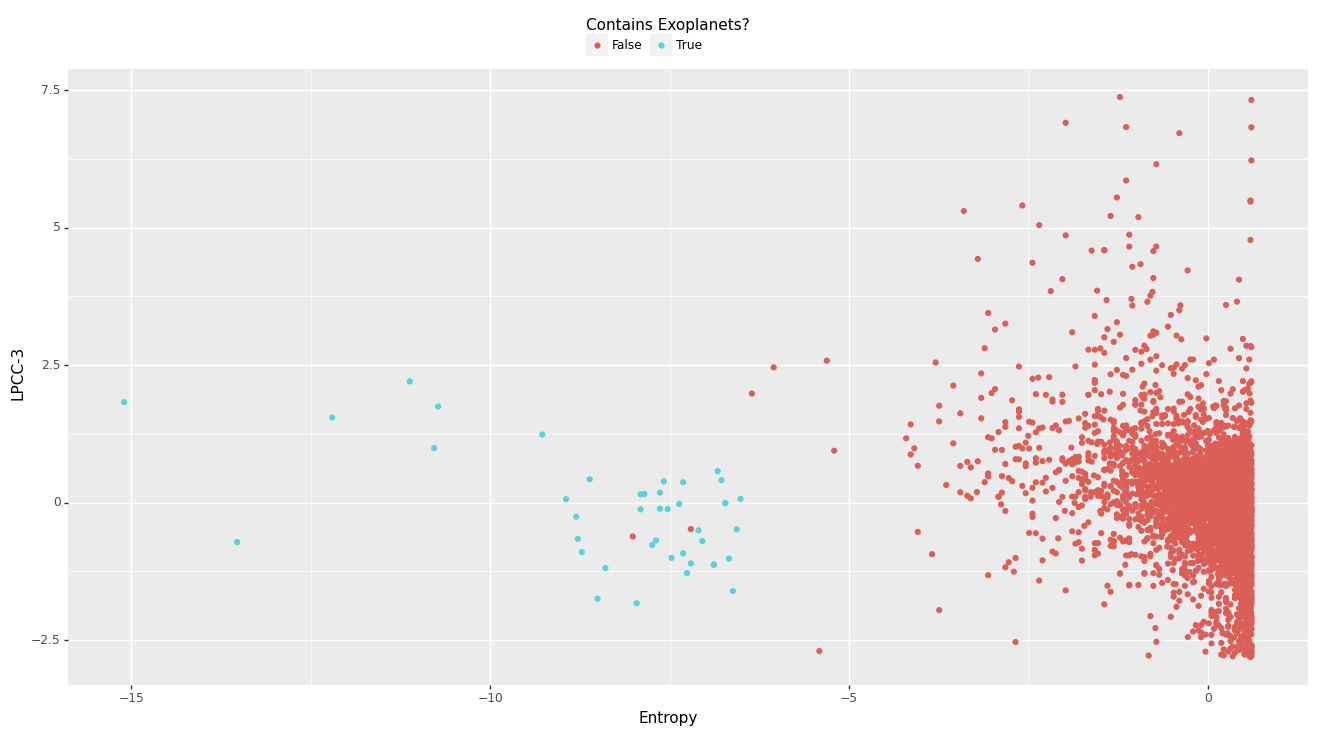

<ggplot: (743407064)>

In [90]:
p9.ggplot(all_data_features_norm_log_first_differences,
  p9.aes(y = '0_LPCC_3', x = '0_Entropy', color = 'exoplanets')
  ) + \
  p9.theme_gray() + \
  p9.geom_point() + \
  p9.xlab('Entropy') + \
  p9.ylab('LPCC-3') + \
  p9.labs(color = 'Contains Exoplanets?') + \
  p9.theme(
    legend_position = 'top',
    legend_box_margin = 0,
    subplots_adjust = {
      'hspace' : 0.15,
    },
    figure_size = (16, 8),
  )